In [133]:
# Import essential libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# Load sales and marketing data
#sales_data = pd.read_csv('/Users/vinitbhanushali/Desktop/Rutgers-Coursework/Capstone_Project/Poland_Sales.csv')  # Your sales data 
marketing_data = pd.read_csv('/Users/vinitbhanushali/Desktop/Rutgers-Coursework/Capstone_Project/Poland_Digital_Activity.csv', encoding='ISO-8859-1')  # Your digital activity data
sales_data = pd.read_csv('/Users/vinitbhanushali/Desktop/Rutgers-Coursework/Capstone_Project/Poland_Sales .csv', encoding='ISO-8859-1')


In [134]:
sales_data.head()

,ï»¿Voivodeship,Date,Value,TV_Geo_Month_dec1,RTE_dec1,FF_VCC_dec1,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Greater Poland Voivodeship,2018-10,21138.00,0.0,0.0,266.5,NaN,NaN,NaN,NaN,NaN
1,Kuyavian-Pomeranian Voivodeship,2018-10,9520.00,0.0,0.0,168.0,NaN,NaN,NaN,NaN,NaN
2,Lesser Poland Voivodeship,2018-10,29354.77,0.0,0.0,228.0,NaN,NaN,NaN,NaN,NaN
3,"Lodz , ÅÃ³dz & ÅÃ³dzkie, Polska",2018-10,13981.00,0.0,0.0,127.0,NaN,NaN,NaN,NaN,NaN
4,Lower Silesian Voivodeship,2018-10,26948.00,0.0,0.0,208.5,NaN,NaN,NaN,NaN,NaN


In [135]:
sales_data = sales_data.drop(columns=['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'])
sales_data.columns = sales_data.columns.str.strip().str.replace('ï»¿', '')

In [136]:
sales_data.head()

,Voivodeship,Date,Value,TV_Geo_Month_dec1,RTE_dec1,FF_VCC_dec1
0,Greater Poland Voivodeship,2018-10,21138.00,0.0,0.0,266.5
1,Kuyavian-Pomeranian Voivodeship,2018-10,9520.00,0.0,0.0,168.0
2,Lesser Poland Voivodeship,2018-10,29354.77,0.0,0.0,228.0
3,"Lodz , ÅÃ³dz & ÅÃ³dzkie, Polska",2018-10,13981.00,0.0,0.0,127.0
4,Lower Silesian Voivodeship,2018-10,26948.00,0.0,0.0,208.5


In [137]:
marketing_data.head()

,ï»¿Month,Voivodeship,Voivodeship_initial,Channel,Budget in PLN,Impressions,Clicks,Website visits,Completed video views,Comments,Reactions,Shares,Campaign start date,Campaign end date,No_Of_Campaign_Days,Unnamed: 15,Unnamed: 16
0,2018-05,Lublin Voivodeship,Lublin Voivodeship,Search,604,"14,526","1,152",NaN,NaN,NaN,NaN,NaN,5/1/18,5/31/18,30,NaN,NaN
1,2018-05,Podkarpackie Voivodeship,Podkarpackie Voivodeship,Search,708,"17,084","1,378",NaN,NaN,NaN,NaN,NaN,5/1/18,5/31/18,30,NaN,NaN
2,2018-05,Greater Poland Voivodeship,Greater Poland Voivodeship,Search,"1,243","27,928","2,274",NaN,NaN,NaN,NaN,NaN,5/1/18,5/31/18,30,NaN,4718272.91
3,2018-05,Lubusz Voivodeship,Lubusz Voivodeship,Search,305,"6,255",570,NaN,NaN,NaN,NaN,NaN,5/1/18,5/31/18,30,NaN,NaN
4,2018-05,ÅwiÄtokrzyskie Voivodeship,ÅwiÄtokrzyskie Voivodeship,Search,323,"7,729",637,NaN,NaN,NaN,NaN,NaN,5/1/18,5/31/18,30,NaN,NaN


In [138]:
marketing_data.count()

ï»¿Month                 1003
Voivodeship              1003
Voivodeship_initial      1003
Channel                  1003
Budget in PLN            1003
Impressions              1003
Clicks                   1003
Website visits            663
Completed video views     510
Comments                  176
Reactions                 176
Shares                    176
Campaign start date      1003
Campaign end date        1003
No_Of_Campaign_Days      1003
Unnamed: 15                 0
Unnamed: 16                 1
dtype: int64

In [139]:
marketing_data = marketing_data.drop(columns=['Unnamed: 15', 'Unnamed: 16'])
marketing_data.columns = marketing_data.columns.str.strip().str.replace('ï»¿', '')

In [140]:
marketing_data.head()

,Month,Voivodeship,Voivodeship_initial,Channel,Budget in PLN,Impressions,Clicks,Website visits,Completed video views,Comments,Reactions,Shares,Campaign start date,Campaign end date,No_Of_Campaign_Days
0,2018-05,Lublin Voivodeship,Lublin Voivodeship,Search,604,"14,526","1,152",NaN,NaN,NaN,NaN,NaN,5/1/18,5/31/18,30
1,2018-05,Podkarpackie Voivodeship,Podkarpackie Voivodeship,Search,708,"17,084","1,378",NaN,NaN,NaN,NaN,NaN,5/1/18,5/31/18,30
2,2018-05,Greater Poland Voivodeship,Greater Poland Voivodeship,Search,"1,243","27,928","2,274",NaN,NaN,NaN,NaN,NaN,5/1/18,5/31/18,30
3,2018-05,Lubusz Voivodeship,Lubusz Voivodeship,Search,305,"6,255",570,NaN,NaN,NaN,NaN,NaN,5/1/18,5/31/18,30
4,2018-05,ÅwiÄtokrzyskie Voivodeship,ÅwiÄtokrzyskie Voivodeship,Search,323,"7,729",637,NaN,NaN,NaN,NaN,NaN,5/1/18,5/31/18,30


In [141]:
print(marketing_data.dtypes)
print(sales_data.dtypes)


Month                    object
Voivodeship              object
Voivodeship_initial      object
Channel                  object
Budget in PLN            object
Impressions              object
Clicks                   object
Website visits           object
Completed video views    object
Comments                 object
Reactions                object
Shares                   object
Campaign start date      object
Campaign end date        object
No_Of_Campaign_Days       int64
dtype: object
Voivodeship           object
Date                  object
Value                float64
TV_Geo_Month_dec1    float64
RTE_dec1             float64
FF_VCC_dec1          float64
dtype: object


In [142]:
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
marketing_data['Month'] = pd.to_datetime(marketing_data['Month'])

In [143]:
# Merge the datasets on Voivodeship and Date/Month
merged_data = pd.merge(sales_data, marketing_data, left_on=['Voivodeship', 'Date'], right_on=['Voivodeship', 'Month'])

# Inspect the merged dataset
merged_data.head()


,Voivodeship,Date,Value,TV_Geo_Month_dec1,RTE_dec1,FF_VCC_dec1,Month,Voivodeship_initial,Channel,Budget in PLN,Impressions,Clicks,Website visits,Completed video views,Comments,Reactions,Shares,Campaign start date,Campaign end date,No_Of_Campaign_Days
0,Greater Poland Voivodeship,2019-02-01,28738.00,0.0,0.0,401.7,2019-02-01,Greater Poland Voivodeship,Search,464,"23,094","1,091",NaN,NaN,NaN,NaN,NaN,2/1/19,2/28/19,27
1,Kuyavian-Pomeranian Voivodeship,2019-02-01,29025.00,0.0,0.0,346.2,2019-02-01,Kuyavian-Pomeranian Voivodeship,Search,254,"11,251",640,NaN,NaN,NaN,NaN,NaN,2/1/19,2/28/19,27
2,Lesser Poland Voivodeship,2019-02-01,58696.03,0.0,0.0,440.5,2019-02-01,Lesser Poland Voivodeship,Search,493,"22,981","1,136",NaN,NaN,NaN,NaN,NaN,2/1/19,2/28/19,27
3,"Lodz , ÅÃ³dz & ÅÃ³dzkie, Polska",2019-02-01,16530.00,0.0,0.0,278.4,2019-02-01,ÅÃ³dÅº Voivodeship,Search,287,"11,733",681,NaN,NaN,NaN,NaN,NaN,2/1/19,2/28/19,27
4,Lower Silesian Voivodeship,2019-02-01,60799.00,0.0,0.0,314.0,2019-02-01,Lower Silesian Voivodeship,Search,334,"16,060",783,NaN,NaN,NaN,NaN,NaN,2/1/19,2/28/19,27


In [118]:
merged_data.count()

Voivodeship              928
Date                     928
Value                    928
TV_Geo_Month_dec1        928
RTE_dec1                 928
FF_VCC_dec1              928
Month                    928
Voivodeship_initial      928
Channel                  928
Budget in PLN            928
Impressions              928
Clicks                   928
Website visits           640
Completed video views    496
Comments                 176
Reactions                176
Shares                   176
Campaign start date      928
Campaign end date        928
No_Of_Campaign_Days      928
dtype: int64

In [150]:
merged_data['Channel'].isna()

0

In [119]:
print(merged_data.dtypes)

Voivodeship                      object
Date                     datetime64[ns]
Value                           float64
TV_Geo_Month_dec1               float64
RTE_dec1                        float64
FF_VCC_dec1                     float64
Month                    datetime64[ns]
Voivodeship_initial              object
Channel                          object
Budget in PLN                    object
Impressions                      object
Clicks                           object
Website visits                   object
Completed video views            object
Comments                         object
Reactions                        object
Shares                           object
Campaign start date              object
Campaign end date                object
No_Of_Campaign_Days               int64
dtype: object


In [120]:
# Remove commas or other formatting issues and convert to numeric
merged_data['Budget in PLN'] = pd.to_numeric(merged_data['Budget in PLN'].str.replace(',', ''), errors='coerce')
merged_data['Impressions'] = pd.to_numeric(merged_data['Impressions'].str.replace(',', ''), errors='coerce')
merged_data['Clicks'] = pd.to_numeric(merged_data['Clicks'].str.replace(',', ''), errors='coerce')
merged_data['Website visits'] = pd.to_numeric(merged_data['Website visits'].str.replace(',', ''), errors='coerce')
merged_data['Completed video views'] = pd.to_numeric(merged_data['Completed video views'].str.replace(',', ''), errors='coerce')
merged_data['Comments'] = pd.to_numeric(merged_data['Comments'].str.replace(',', ''), errors='coerce')
merged_data['Reactions'] = pd.to_numeric(merged_data['Reactions'].str.replace(',', ''), errors='coerce')
merged_data['Shares'] = pd.to_numeric(merged_data['Shares'].str.replace(',', ''), errors='coerce')


In [151]:
# Option 1: Fill NaN values with 0 or another default value
merged_data.fillna(0, inplace=True)

# Option 2: Drop rows with NaN values
# merged_data.dropna(inplace=True)


In [154]:
merged_data['Channel'].isna().sum()

0

In [122]:
# List all the columns in the merged dataset
merged_data.columns

Index(['Voivodeship', 'Date', 'Value', 'TV_Geo_Month_dec1', 'RTE_dec1',
       'FF_VCC_dec1', 'Month', 'Voivodeship_initial', 'Channel',
       'Budget in PLN', 'Impressions', 'Clicks', 'Website visits',
       'Completed video views', 'Comments', 'Reactions', 'Shares',
       'Campaign start date', 'Campaign end date', 'No_Of_Campaign_Days'],
      dtype='object')

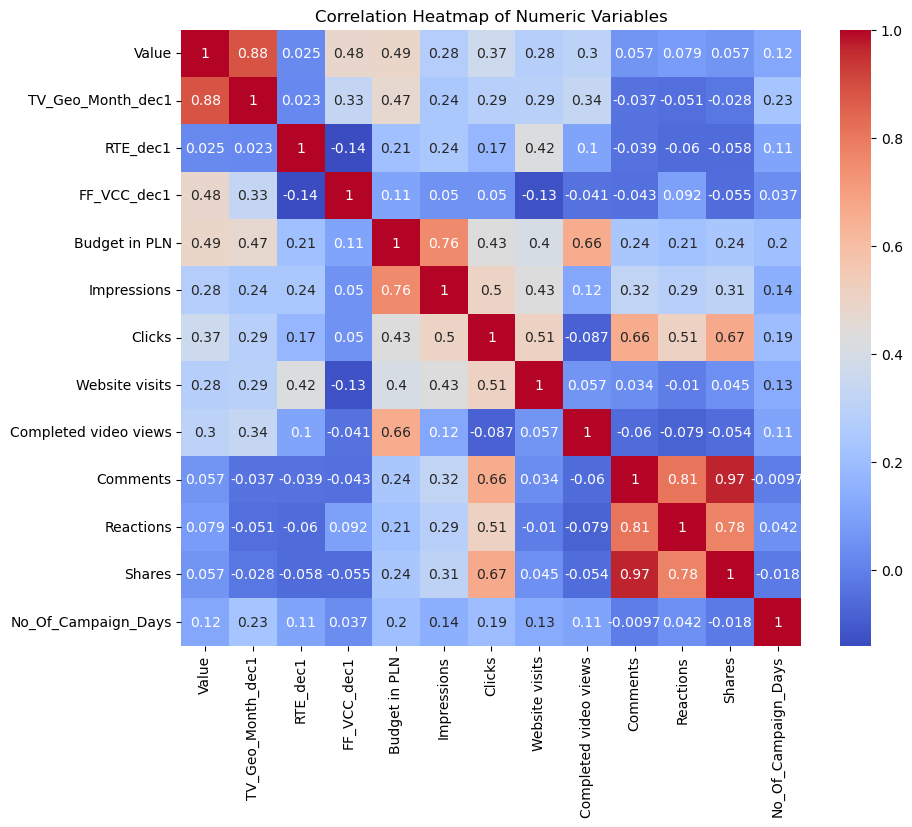

In [123]:
# Select only numeric columns from the merged_data
numeric_data = merged_data.select_dtypes(include=[np.number])

# Now calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot a heatmap to visualize correlations
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()


In [124]:
merged_data.head()

,Voivodeship,Date,Value,TV_Geo_Month_dec1,RTE_dec1,FF_VCC_dec1,Month,Voivodeship_initial,Channel,Budget in PLN,Impressions,Clicks,Website visits,Completed video views,Comments,Reactions,Shares,Campaign start date,Campaign end date,No_Of_Campaign_Days
0,Greater Poland Voivodeship,2019-02-01,28738.00,0.0,0.0,401.7,2019-02-01,Greater Poland Voivodeship,Search,464,23094.0,1091.0,0.0,0.0,0.0,0.0,0.0,2/1/19,2/28/19,27
1,Kuyavian-Pomeranian Voivodeship,2019-02-01,29025.00,0.0,0.0,346.2,2019-02-01,Kuyavian-Pomeranian Voivodeship,Search,254,11251.0,640.0,0.0,0.0,0.0,0.0,0.0,2/1/19,2/28/19,27
2,Lesser Poland Voivodeship,2019-02-01,58696.03,0.0,0.0,440.5,2019-02-01,Lesser Poland Voivodeship,Search,493,22981.0,1136.0,0.0,0.0,0.0,0.0,0.0,2/1/19,2/28/19,27
3,"Lodz , ÅÃ³dz & ÅÃ³dzkie, Polska",2019-02-01,16530.00,0.0,0.0,278.4,2019-02-01,ÅÃ³dÅº Voivodeship,Search,287,11733.0,681.0,0.0,0.0,0.0,0.0,0.0,2/1/19,2/28/19,27
4,Lower Silesian Voivodeship,2019-02-01,60799.00,0.0,0.0,314.0,2019-02-01,Lower Silesian Voivodeship,Search,334,16060.0,783.0,0.0,0.0,0.0,0.0,0.0,2/1/19,2/28/19,27


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Greater Poland Voivodeship'),
  Text(1, 0, 'Kuyavian-Pomeranian Voivodeship'),
  Text(2, 0, 'Lesser Poland Voivodeship'),
  Text(3, 0, 'Lodz , Å\x81Ã³dz & Å\x81Ã³dzkie, Polska'),
  Text(4, 0, 'Lower Silesian Voivodeship'),
  Text(5, 0, 'Lublin Voivodeship'),
  Text(6, 0, 'Lubusz Voivodeship'),
  Text(7, 0, 'Masovian Voivodeship'),
  Text(8, 0, 'Opole Voivodeship'),
  Text(9, 0, 'Podkarpackie Voivodeship'),
  Text(10, 0, 'Podlaskie Voivodeship'),
  Text(11, 0, 'Pomeranian Voivodeship'),
  Text(12, 0, 'Silesian Voivodeship'),
  Text(13, 0, 'Warmian-Masurian Voivodeship'),
  Text(14, 0, 'West Pomeranian Voivodeship'),
  Text(15, 0, 'Å\x9awiÄ\x99tokrzyskie Voivodeship')])

/Users/vinitbhanushali/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 129 (\x81) missing from current font.
  func(*args, **kwargs)
/Users/vinitbhanushali/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 154 (\x9a) missing from current font.
  func(*args, **kwargs)
/Users/vinitbhanushali/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 153 (\x99) missing from current font.
  func(*args, **kwargs)
/Users/vinitbhanushali/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/vinitbhanushali/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 154 (\x9a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/vinitbhanushali/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarnin

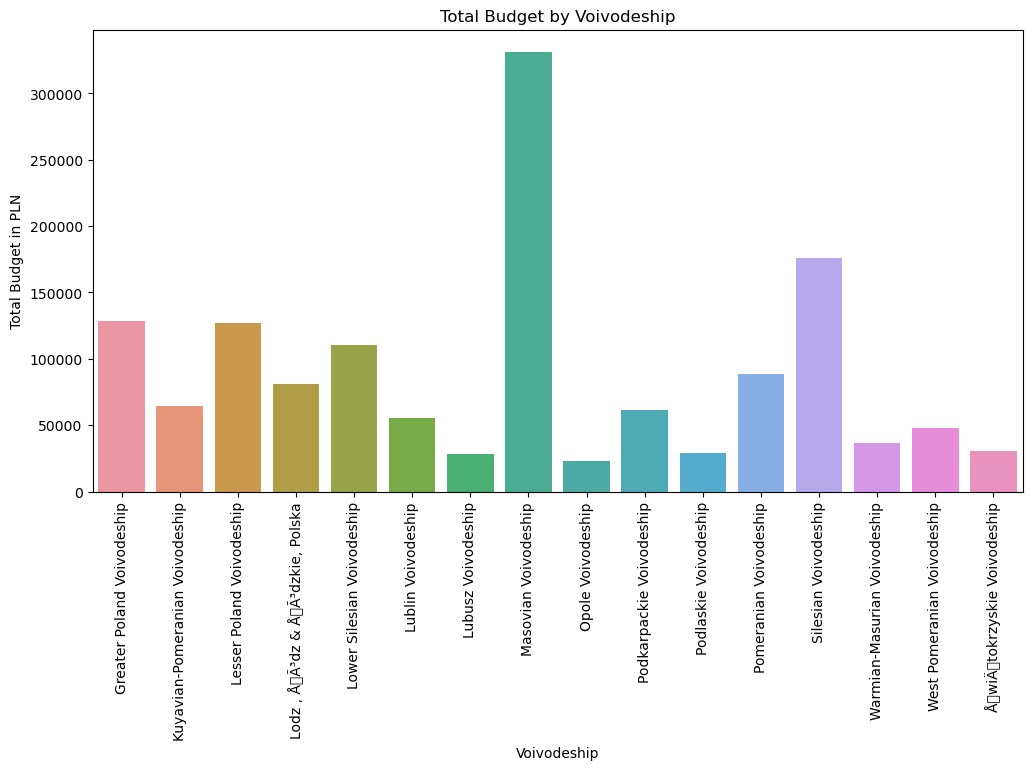

In [125]:
budget_by_voivodeship = merged_data.groupby('Voivodeship')['Budget in PLN'].sum().reset_index()

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x='Voivodeship', y='Budget in PLN', data=budget_by_voivodeship)

# Set the title and labels
plt.title('Total Budget by Voivodeship')
plt.xlabel('Voivodeship')
plt.ylabel('Total Budget in PLN')

# Rotate x labels for better readability
plt.xticks(rotation=90)

/var/folders/_c/dryy8y6545g9lbd6jb2d5g200000gn/T/ipykernel_80698/4127168058.py:19: UserWarning: Glyph 129 (\x81) missing from current font.
  plt.tight_layout()
/var/folders/_c/dryy8y6545g9lbd6jb2d5g200000gn/T/ipykernel_80698/4127168058.py:19: UserWarning: Glyph 154 (\x9a) missing from current font.
  plt.tight_layout()
/var/folders/_c/dryy8y6545g9lbd6jb2d5g200000gn/T/ipykernel_80698/4127168058.py:19: UserWarning: Glyph 153 (\x99) missing from current font.
  plt.tight_layout()


<Figure size 1400x700 with 0 Axes>

/Users/vinitbhanushali/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/vinitbhanushali/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 154 (\x9a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/vinitbhanushali/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


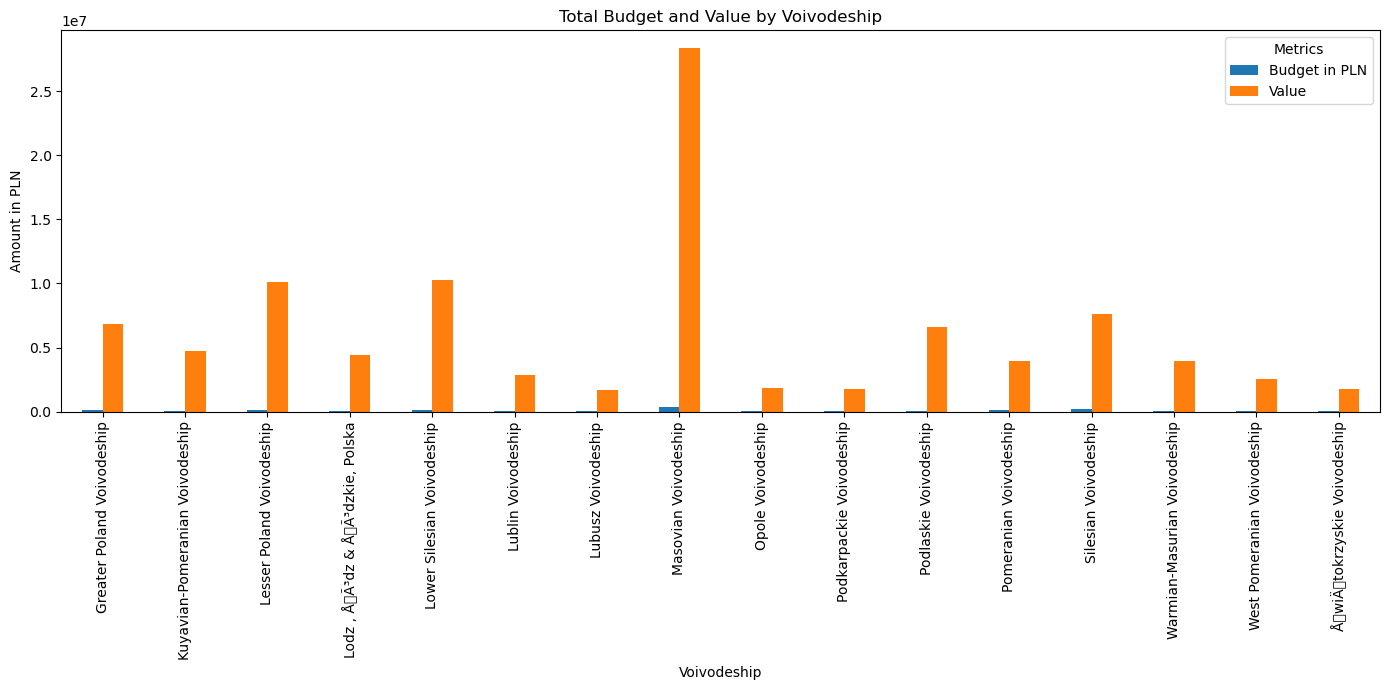

In [126]:
# Group by 'Voivodeship' and sum the budget and value
summary = merged_data.groupby('Voivodeship').agg({'Budget in PLN': 'sum', 'Value': 'sum'}).reset_index()

# Set the figure size
plt.figure(figsize=(14, 7))

# Create the bar plot
summary.set_index('Voivodeship').plot(kind='bar', figsize=(14, 7))

# Set the title and labels
plt.title('Total Budget and Value by Voivodeship')
plt.xlabel('Voivodeship')
plt.ylabel('Amount in PLN')

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.legend(title='Metrics', labels=['Budget in PLN', 'Value'])
plt.show()

/var/folders/_c/dryy8y6545g9lbd6jb2d5g200000gn/T/ipykernel_80698/1113635820.py:31: UserWarning: Glyph 129 (\x81) missing from current font.
  plt.tight_layout()
/var/folders/_c/dryy8y6545g9lbd6jb2d5g200000gn/T/ipykernel_80698/1113635820.py:31: UserWarning: Glyph 154 (\x9a) missing from current font.
  plt.tight_layout()
/var/folders/_c/dryy8y6545g9lbd6jb2d5g200000gn/T/ipykernel_80698/1113635820.py:31: UserWarning: Glyph 153 (\x99) missing from current font.
  plt.tight_layout()
/Users/vinitbhanushali/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/vinitbhanushali/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 154 (\x9a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/vinitbhanushali/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 153 (\x99) missing

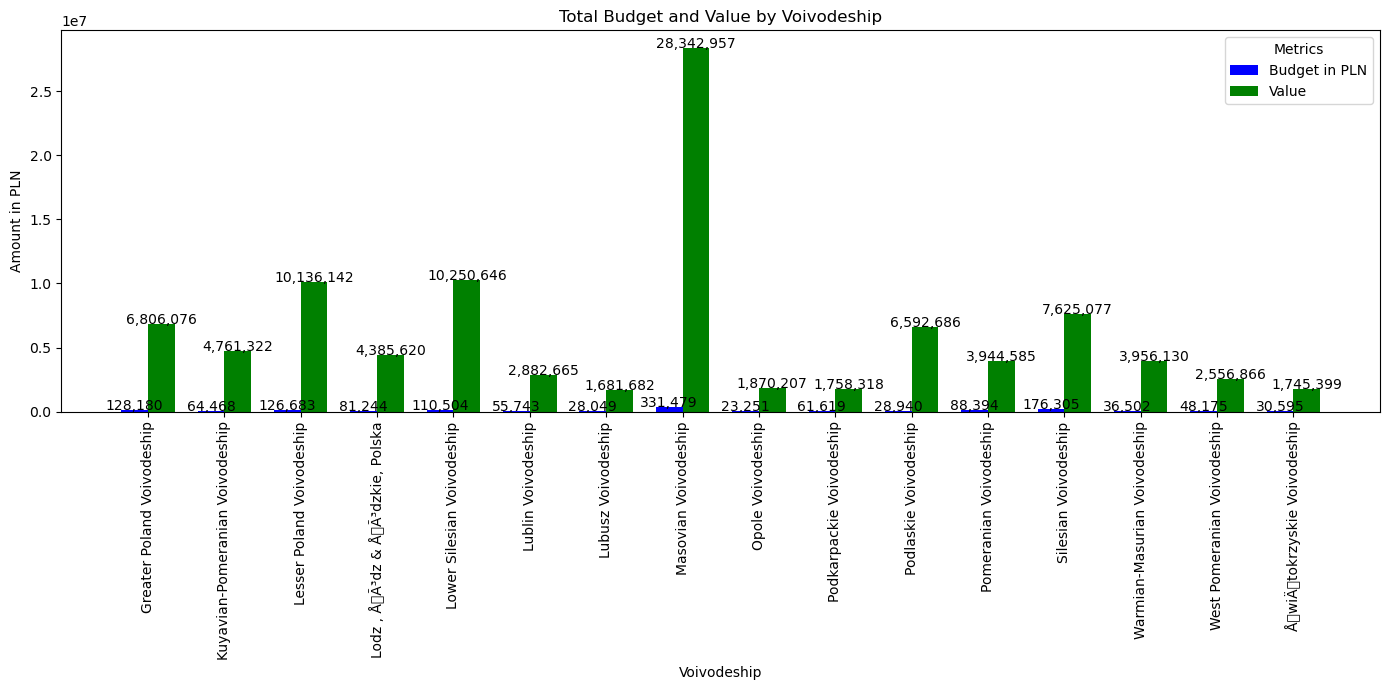

In [127]:
summary = merged_data.groupby('Voivodeship').agg({'Budget in PLN': 'sum', 'Value': 'sum'}).reset_index()

# Set the figure size
plt.figure(figsize=(14, 7))

# Create the bar plot
bar_width = 0.35  # Width of the bars
x = range(len(summary))  # X locations for the groups

# Create bars for Budget and Value
plt.bar(x, summary['Budget in PLN'], width=bar_width, label='Budget in PLN', color='b')
plt.bar([p + bar_width for p in x], summary['Value'], width=bar_width, label='Value', color='g')

# Adding labels on the bars
for i in range(len(summary)):
    plt.text(i, summary['Budget in PLN'].iloc[i] + 1000, f"{summary['Budget in PLN'].iloc[i]:,.0f}", ha='center', color='black')
    plt.text(i + bar_width, summary['Value'].iloc[i] + 1000, f"{summary['Value'].iloc[i]:,.0f}", ha='center', color='black')

# Set the title and labels
plt.title('Total Budget and Value by Voivodeship')
plt.xlabel('Voivodeship')
plt.ylabel('Amount in PLN')

# Set x-ticks to the center of the grouped bars
plt.xticks([p + bar_width / 2 for p in x], summary['Voivodeship'], rotation=90)

# Show the legend
plt.legend(title='Metrics')

# Show the plot
plt.tight_layout()
plt.show()

In [129]:
# Define the target variable
y = merged_data['Value']

# Define the selected independent variables
X = merged_data[['TV_Geo_Month_dec1', 
                 'Budget in PLN', 
                 'Impressions', 
                 'Clicks', 
                 'Completed video views',
                 'Reactions']]

# Check for any missing values in the selected columns
print(X.isnull().sum())

# Handle missing values (if any)
X = X.fillna(0)  # Filling NaN values with 0, can be changed based on the context

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of the training data to verify the setup
print("Training Data (X_train):\n", X_train.head())
print("Training Target (y_train):\n", y_train.head())


TV_Geo_Month_dec1        0
Budget in PLN            0
Impressions              0
Clicks                   0
Completed video views    0
Reactions                0
dtype: int64
Training Data (X_train):
      TV_Geo_Month_dec1  Budget in PLN  Impressions  Clicks  \
381            0.00000            198       3974.0   643.0   
499            0.00000           1461      69275.0     0.0   
97         17255.13979            370      26507.0   100.0   
250         4474.60924           1723     453931.0  1716.0   
198        64912.00062           1406     536513.0   459.0   

     Completed video views  Reactions  
381                    0.0        0.0  
499                39610.0        0.0  
97                 12549.0        0.0  
250                    0.0      125.0  
198                    0.0        0.0  
Training Target (y_train):
 381     10666.00
499     90516.00
97      50658.00
250     54096.00
198    323865.67
Name: Value, dtype: float64


In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict using the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 6839262810.32194
R-squared: 0.7280756971784704


In [131]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


                       Coefficient
TV_Geo_Month_dec1         2.692941
Budget in PLN            17.618361
Impressions              -0.047495
Clicks                    2.336167
Completed video views    -0.168449
Reactions               118.272589


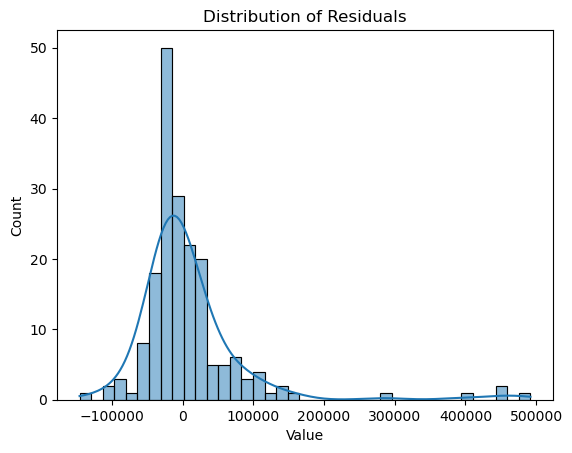

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.show()


In [91]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Assuming X and y are defined previously
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create interaction terms for both training and test sets
X_train['Budget_Impressions'] = X_train['Budget in PLN'] * X_train['Impressions']
X_train['Budget_Clicks'] = X_train['Budget in PLN'] * X_train['Clicks']

X_test['Budget_Impressions'] = X_test['Budget in PLN'] * X_test['Impressions']
X_test['Budget_Clicks'] = X_test['Budget in PLN'] * X_test['Clicks']

# Initialize the scaler
scaler = StandardScaler()

# Scale the training data
X_train_scaled = scaler.fit_transform(X_train)

# Scale the test data (using the same scaler)
X_test_scaled = scaler.transform(X_test)

# Fit the model with scaled data
model_scaled = sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit()

# Display the summary of the scaled model
print(model_scaled.summary())


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     474.4
Date:                Thu, 03 Oct 2024   Prob (F-statistic):          1.83e-267
Time:                        11:43:54   Log-Likelihood:                -9197.3
No. Observations:                 742   AIC:                         1.841e+04
Df Residuals:                     734   BIC:                         1.845e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.051e+05   2158.240     48.701      0.0

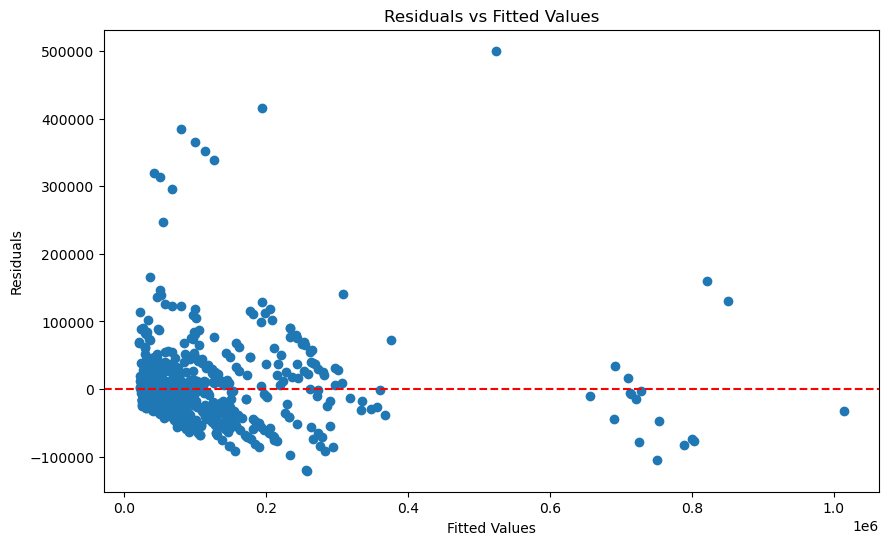

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Get predictions and residuals
y_pred = model_scaled.predict(sm.add_constant(X_train_scaled))
residuals = y_train - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
X_with_const = sm.add_constant(X_train)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
print(vif_data)


                 Feature        VIF
0                  const   2.175195
1      TV_Geo_Month_dec1   1.529082
2          Budget in PLN  14.853067
3            Impressions  10.163755
4                 Clicks   3.619018
5  Completed video views   5.287355
6     Budget_Impressions   7.471044
7          Budget_Clicks   7.607106


In [96]:
# Define the target variable
y = merged_data['Value']

# Define the independent variables (after cleaning)
X = merged_data[['TV_Geo_Month_dec1', 
                 'Budget in PLN', 
                 'Impressions', 
                 'Clicks', 
                 'Completed video views']]
# Verify the features
print(X.head())


   TV_Geo_Month_dec1  Budget in PLN  Impressions  Clicks  \
0                0.0            464      23094.0  1091.0   
1                0.0            254      11251.0   640.0   
2                0.0            493      22981.0  1136.0   
3                0.0            287      11733.0   681.0   
4                0.0            334      16060.0   783.0   

   Completed video views  
0                    0.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    0.0  


In [97]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to the model (intercept)
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fit the OLS model
model = sm.OLS(y_train, X_train_const).fit()

# Print the summary of the model
print(model.summary())

# Predict on the test set
y_pred = model.predict(X_test_const)

# Evaluate the model (you can add additional metrics)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     647.4
Date:                Thu, 03 Oct 2024   Prob (F-statistic):          1.35e-266
Time:                        13:19:33   Log-Likelihood:                -9205.8
No. Observations:                 742   AIC:                         1.842e+04
Df Residuals:                     736   BIC:                         1.845e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   2.86e+